#### Análise exploratória dos dados

1. Bibliotecas utilizadas

In [1]:
import pandas as pd # pandas
import matplotlib.pyplot as plt # matplotlib
from wordcloud import WordCloud # wordcloud

2. Leitura do dataset utilizado

In [2]:
df_sentimentos = pd.read_csv("./data/data.csv",sep=",",encoding="utf-8")
df_sentimentos.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


3. extraindo algumas infos

In [3]:
# Visualizando os dados de forma aleatória
display(df_sentimentos.sample(5))

,Sentence,Sentiment
2126,Espoon kaupunki awarded contracts for personal...,positive
2818,The facility consists of a seven year bullet t...,neutral
5575,The original contract was signed last summer .,neutral
4394,`` My wife is looking forward to getting a pay...,neutral
4102,"Back then , Tikkurila 's former owner , Finnis...",neutral


In [4]:
# Visualizando informações gerais sobre o dataset
df_sentimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
# Visualizando a distribuição dos dados
colunas = list(df_sentimentos.columns)
for coluna in colunas:
	print(f"Distribuição da coluna {coluna}")
	print(df_sentimentos[coluna].value_counts())
	print("\n")

Distribuição da coluna Sentence
Sentence
Managing Director 's comments : `` Net sales for the first quarter were notably lower than a year before , especially in Finland , Russia and the Baltic countries .                                                          2
Scanfil , a systems supplier and contract manufacturer to the communications sector , will give notice to 20 productional employees , and temporarily lay off 15 employees at the company 's plant in Sievi , in Finland .    2
Profit before taxes decreased to EUR 31.6 mn from EUR 50.0 mn the year before .                                                                                                                                               2
Pretax loss totalled EUR 49.9 mn , compared to a loss of EUR 15.4 mn in the corresponding period in 2008 .                                                                                                                    2
Operating loss of the Pulp & Paper Machinery unit was over EUR 

In [6]:
# Tamanho do dataset
print("Tamanho do dataset")
print("Quantidade de linhas: ", df_sentimentos.shape[0])
print("Quantidade de colunas: ", df_sentimentos.shape[1])

Tamanho do dataset
Quantidade de linhas:  5842
Quantidade de colunas:  2


In [7]:
# Visualizando a quantidade de dados faltantes
print("Dados faltantes: ")
print(df_sentimentos.isnull().sum())

Dados faltantes: 
Sentence     0
Sentiment    0
dtype: int64


In [8]:
# Ver estatísticas descritivas do datasetp
print(df_sentimentos.describe())

                                                 Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Managing Director 's comments : `` Net sales f...   neutral
freq                                                    2      3130


In [9]:
df_sentimentos['sentence_length'] = df_sentimentos['Sentence'].apply(lambda x: len(x.split()))
df_sentimentos['sentence_length'].describe()

count    5842.000000
mean       21.004793
std        10.306465
min         2.000000
25%        13.000000
50%        19.000000
75%        27.000000
max        81.000000
Name: sentence_length, dtype: float64

In [10]:
#valores duplicados
print("Valores duplicados: ")
df_sentimentos_duplicados = df_sentimentos[df_sentimentos.duplicated()]
display(df_sentimentos_duplicados)
# Dropando valores duplicados
print("Dropando valores duplicados: ")
df_sentimentos_clean = df_sentimentos.drop_duplicates()
display(df_sentimentos_clean)

Valores duplicados: 


,Sentence,Sentiment,sentence_length
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral,48
1859,SSH Communications Security Corporation is hea...,neutral,11
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral,11
3272,The company serves customers in various indust...,neutral,45
3986,The issuer is solely responsible for the conte...,neutral,12
5342,The report profiles 614 companies including ma...,neutral,51


Dropando valores duplicados: 


,Sentence,Sentiment,sentence_length
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,17
5838,Nordic Walking was first used as a summer trai...,neutral,14
5839,"According shipping company Viking Line , the E...",neutral,16
5840,"In the building and home improvement trade , s...",neutral,18


In [11]:
# pegando os dados duplicados e vendo que algumas sentencas estão com sentimentos diferentes
df_sentimentos_duplicados = df_sentimentos_clean[df_sentimentos_clean.duplicated(subset=['Sentence'], keep=False)]
df_sentimentos_duplicados_ordenados = df_sentimentos_duplicados.sort_values(by='Sentence')
display(df_sentimentos_duplicados_ordenados)
print("Quantidade de sentimentos: ", df_sentimentos_duplicados_ordenados['Sentiment'].value_counts())

,Sentence,Sentiment,sentence_length
3685,"( ADP News ) - Feb 11 , 2009 - Finnish wood pr...",negative,46
4578,"( ADP News ) - Feb 11 , 2009 - Finnish wood pr...",neutral,46
1488,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",negative,44
3765,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",neutral,44
1051,"( ADP News ) - Feb 4 , 2009 - Finnish broadban...",negative,48
...,...,...,...
5612,down to EUR5 .9 m H1 '09 3 August 2009 - Finni...,neutral,43
904,in Finland Finnish pharmaceutical company Orio...,neutral,35
3368,in Finland Finnish pharmaceutical company Orio...,negative,35
3075,stores 16 March 2010 - Finnish stationery and ...,negative,44


Quantidade de sentimentos:  Sentiment
negative    514
neutral     514
Name: count, dtype: int64


In [12]:
#deixando somente os dados unicos
df_sentimentos_unicos = df_sentimentos_clean.drop_duplicates(subset=['Sentence'], keep=False)
df_sentimentos_unicos

,Sentence,Sentiment,sentence_length
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23
...,...,...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative,10
5836,Daily Mail parent company in talks with potent...,positive,18
5838,Nordic Walking was first used as a summer trai...,neutral,14
5839,"According shipping company Viking Line , the E...",neutral,16


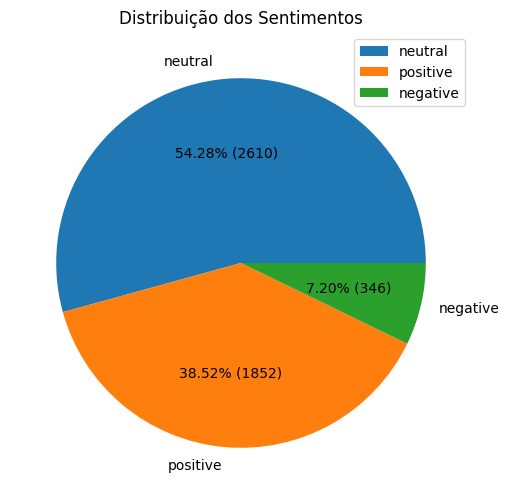

In [13]:
sentimentos_counts = df_sentimentos_unicos['Sentiment'].value_counts()
# Criar um gráfico de pizza
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(sentimentos_counts, labels = sentimentos_counts.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*sentimentos_counts.sum()))
plt.title('Distribuição dos Sentimentos')
plt.legend(patches, sentimentos_counts.index, loc="best")
plt.show()

In [14]:
print("Exemplo: ",df_sentimentos_unicos['Sentence'].iloc[1])

Exemplo:  $ESI on lows, down $1.50 to $2.50 BK a real possibility


#### Tratamento dos dados

1. Importação das bibliotecas utilizadas no processo de tratamento dos dados

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

2. Downloads necessários

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/zairo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/zairo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/zairo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

3. Limpeza dos dados

In [17]:
# Definir o idioma das stopwords
stop_words = set(stopwords.words('english'))

In [18]:
def clean_text(texto):
    texto = re.sub(r'[^\w\s]', '', texto) 
    palavras = word_tokenize(texto)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(palavra.lower()) for palavra in palavras if palavra.lower() not in stop_words]
    return text

In [19]:
df_sentimentos_unicos = df_sentimentos_unicos.copy()
df_sentimentos_unicos['cleaned_sentence'] = df_sentimentos_unicos['Sentence'].apply(lambda x: clean_text(x))
df_sentimentos_unicos['cleaned_sentence_length'] = df_sentimentos_unicos['cleaned_sentence'].apply(lambda x: len(x))
df_sentimentos_unicos.head(5)

,Sentence,Sentiment,sentence_length,cleaned_sentence,cleaned_sentence_length
0,The GeoSolutions technology will leverage Bene...,positive,32,"[geosolutions, technology, leverage, benefon, ...",21
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11,"[esi, low, 150, 250, bk, real, possibility]",7
2,"For the last quarter of 2010 , Componenta 's n...",positive,39,"[last, quarter, 2010, componenta, net, sale, d...",19
3,According to the Finnish-Russian Chamber of Co...,neutral,20,"[according, finnishrussian, chamber, commerce,...",10
4,The Swedish buyout firm has sold its remaining...,neutral,23,"[swedish, buyout, firm, sold, remaining, 224, ...",15


4. Tratamento dos dados

In [20]:
def quebrar_sentencas(text):
    return nltk.sent_tokenize(text)

In [21]:
# Aplicar a função na coluna 'Sentence'
df_sentimentos_unicos['Sentence_sents'] = df_sentimentos_unicos['Sentence'].apply(quebrar_sentencas)

# Contar o número de sentenças em cada linha
df_sentimentos_unicos['qtd_sentencas'] = df_sentimentos_unicos['Sentence_sents'].apply(len)

# Filtrar e imprimir as linhas onde o número de sentenças é maior ou igual a 2
df_sentimentos_unicos[df_sentimentos_unicos['qtd_sentencas'] >= 2]

,Sentence,Sentiment,sentence_length,cleaned_sentence,cleaned_sentence_length,Sentence_sents,qtd_sentencas
11,$SAP Q1 disappoints as #software licenses down...,negative,18,"[sap, q1, disappoints, software, license, real...",16,[$SAP Q1 disappoints as #software licenses dow...,3
39,$AAPL afternoon selloff as usual will be bruta...,negative,16,"[aapl, afternoon, selloff, usual, brutal, get,...",10,[$AAPL afternoon selloff as usual will be brut...,2
60,$VIPS similar pattern like beginning of May. D...,positive,19,"[vip, similar, pattern, like, beginning, may, ...",13,"[$VIPS similar pattern like beginning of May.,...",3
65,Most bullish stocks on Twitter during this dip...,positive,20,"[bullish, stock, twitter, dip, yhoo, gdx, goog...",15,[Most bullish stocks on Twitter during this di...,2
121,Name of Applicant : Jot Automation OYName of I...,neutral,31,"[name, applicant, jot, automation, oyname, inv...",19,[Name of Applicant : Jot Automation OYName of ...,2
...,...,...,...,...,...,...,...
5778,Still short $LNG from $11.70 area...next stop ...,negative,24,"[still, short, lng, 1170, areanext, stop, coul...",14,[Still short $LNG from $11.70 area...next stop...,3
5808,"$QCOM The indicator RSI is over 50, which stan...",positive,17,"[qcom, indicator, rsi, 50, stand, 561, upward,...",10,"[$QCOM The indicator RSI is over 50, which sta...",2
5809,$FB they are hitting everything in sight.shor...,negative,10,"[fb, hitting, everything, sightshort, twtr]",5,[$FB they are hitting everything in sight.sho...,2
5810,$GOOG resistance turned support? It,positive,5,"[goog, resistance, turned, support]",4,"[$GOOG resistance turned support?, It]",2


In [22]:
df_sentimentos_unicos.loc[11,'Sentence']

'$SAP Q1 disappoints as #software licenses down. Real problem? #Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5'

In [23]:
for frase in df_sentimentos_unicos.loc[11, 'Sentence_sents']:
    print(frase)

$SAP Q1 disappoints as #software licenses down.
Real problem?
#Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5


In [24]:
df_sentimentos_unicos[df_sentimentos_unicos['qtd_sentencas'] >= 2].value_counts('Sentiment')

Sentiment
positive    153
negative     93
neutral      57
Name: count, dtype: int64

5. Nuvem de palavras

In [25]:
def nuvem_palavras(sentiment):
    df = df_sentimentos_unicos[df_sentimentos_unicos['Sentiment'] == sentiment]
    text = ' '.join(palavra for sublist in df.cleaned_sentence for palavra in sublist)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuvem de palavras para o sentimento: {sentiment}")
    plt.show()

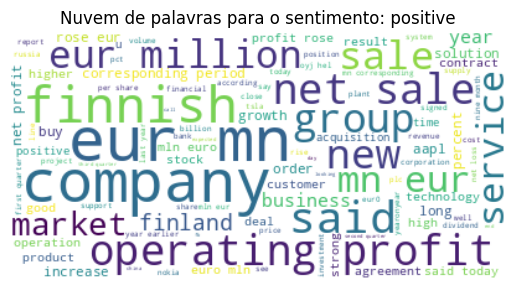

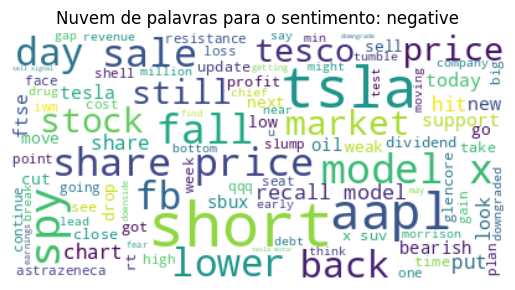

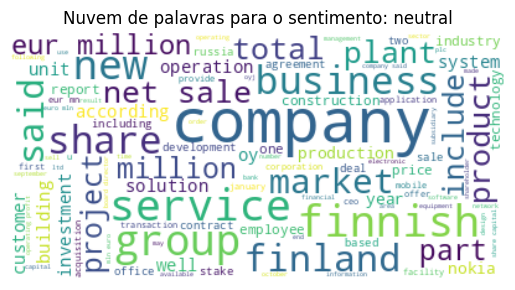

In [26]:
sentimentos = df_sentimentos_unicos['Sentiment'].unique()
for sentimento in sentimentos:
	nuvem_palavras(sentimento)

6. Preparando o dataset para treinar o modelo

In [27]:
df_sentimentos_unicos = df_sentimentos_unicos.drop(['sentence_length', 'cleaned_sentence_length'], axis=1)
df_sentimentos_unicos.sample(3)

,Sentence,Sentiment,cleaned_sentence,Sentence_sents,qtd_sentencas
3515,Supreme Court Upholds $236 Million Jury Award ...,negative,"[supreme, court, upholds, 236, million, jury, ...",[Supreme Court Upholds $236 Million Jury Award...,1
580,Followed the levels I shared with you on $NFLX...,positive,"[followed, level, shared, nflx, googl, tsla, c...",[Followed the levels I shared with you on $NFL...,3
1301,The Department Store Division reported an incr...,positive,"[department, store, division, reported, increa...",[The Department Store Division reported an inc...,1


In [28]:
df_sentimentos_unicos['cleaned_sentence_str'] = df_sentimentos_unicos['cleaned_sentence'].apply(' '.join)
df_sentimentos_unicos.sample(3)

,Sentence,Sentiment,cleaned_sentence,Sentence_sents,qtd_sentencas,cleaned_sentence_str
767,The diesel margin has remained high .,positive,"[diesel, margin, remained, high]",[The diesel margin has remained high .],1,diesel margin remained high
4275,The ` buy ' recommendation was reiterated .,positive,"[buy, recommendation, reiterated]",[The ` buy ' recommendation was reiterated .],1,buy recommendation reiterated
2032,"According to Olvi , the company is already neg...",neutral,"[according, olvi, company, already, negotiatin...","[According to Olvi , the company is already ne...",1,according olvi company already negotiating new...


In [29]:
df_sentimentos_unicos['Sentimento_Num'] = df_sentimentos_unicos['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})
df_sentimentos_unicos.sample(3)

,Sentence,Sentiment,cleaned_sentence,Sentence_sents,qtd_sentencas,cleaned_sentence_str,Sentimento_Num
691,"Furthermore , our fully electrically driven cr...",positive,"[furthermore, fully, electrically, driven, cra...","[Furthermore , our fully electrically driven c...",1,furthermore fully electrically driven crane en...,2
433,"Operating profit was EUR 11.4 mn , up from EUR...",positive,"[operating, profit, eur, 114, mn, eur, 75, mn]","[Operating profit was EUR 11.4 mn , up from EU...",1,operating profit eur 114 mn eur 75 mn,2
1784,"The order includes a steel frame , load-bearin...",neutral,"[order, includes, steel, frame, loadbearing, r...","[The order includes a steel frame , load-beari...",1,order includes steel frame loadbearing roof st...,1


In [43]:
df_sentimentos_unicos['Sentimento_Num'].value_counts()

Sentimento_Num
1    2610
2    1852
0     346
Name: count, dtype: int64

#### SVM

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Carregue os dados e realize a divisão entre treino e teste
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sentimentos_unicos['cleaned_sentence_str'])
X_train, X_test, y_train, y_test = train_test_split(X, df_sentimentos_unicos['Sentimento_Num'], test_size=0.3, random_state=42)

# Defina os parâmetros a serem testados
param_grid = {'C': [0.1, 1, 10, 100]}

# Inicialize o classificador SVM
clf = svm.SVC(kernel='linear', gamma='scale', class_weight='balanced')

# Realize a busca em grade com validação cruzada
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Obtenha os melhores parâmetros
best_params = grid_search.best_params_

# Use os melhores parâmetros para treinar o modelo final
clf = svm.SVC(kernel='linear', C=best_params['C'], gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train)

# Faça previsões e imprima o relatório de classificação
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.42      0.47       113
           1       0.83      0.83      0.83       796
           2       0.70      0.75      0.73       534

    accuracy                           0.77      1443
   macro avg       0.70      0.66      0.68      1443
weighted avg       0.76      0.77      0.76      1443



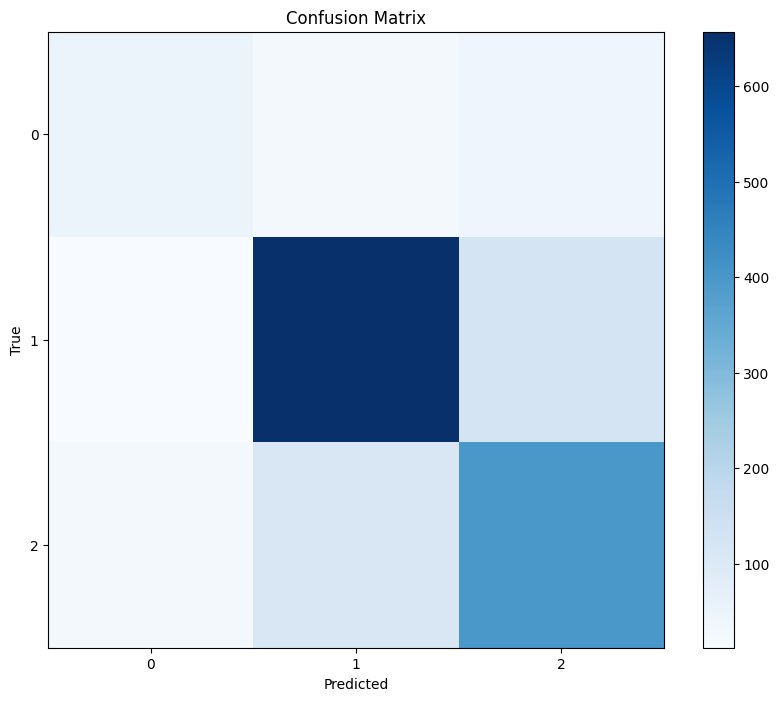

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [str(i) for i in range(len(conf_matrix))]
tick_marks = [i for i in range(len(conf_matrix))]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

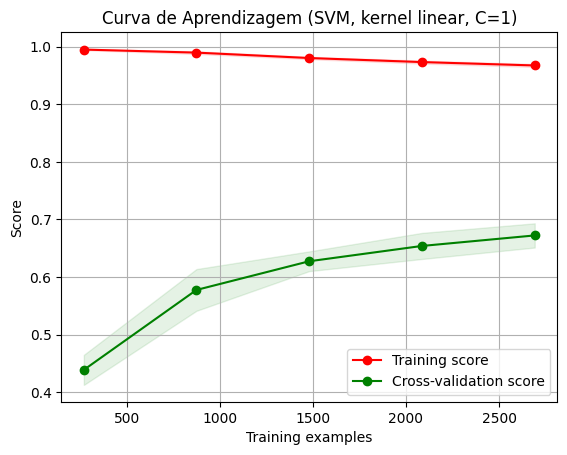

In [84]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar a curva de aprendizagem
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plote a curva de aprendizagem
title = "Curva de Aprendizagem (SVM, kernel linear, C={})".format(best_params['C'])
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


        Feature  Coefficient
9262      short     2.675614
10324      tsla     2.093482
1413       aapl     2.050837
9569        spy     1.883436
3693       drop     1.753957
9020       sbux     1.730388
4410         fb     1.557717
9411      slump     1.530880
4858   glencore     1.416635
10064     tesco     1.408761


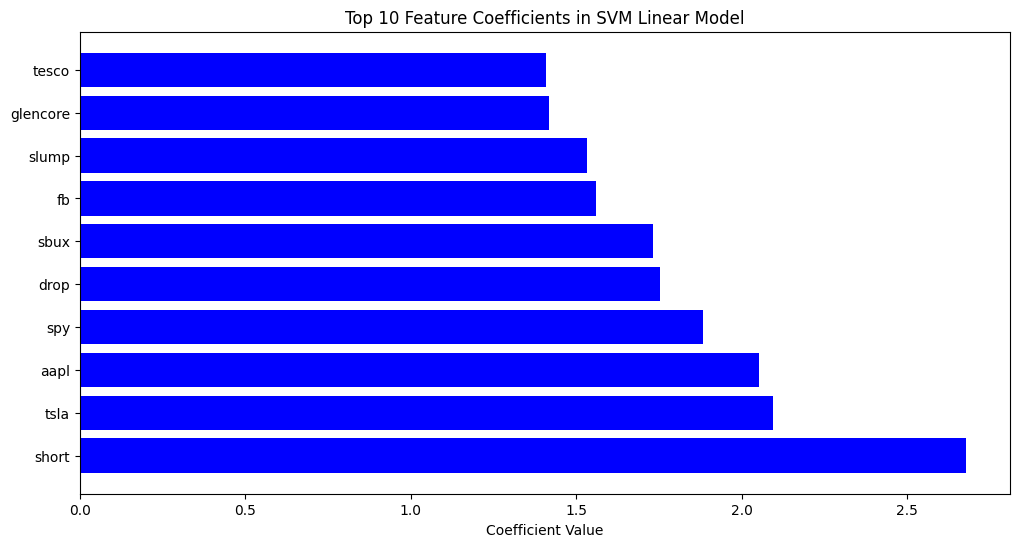

In [86]:
# Obtenha os coeficientes das características
coefficients = clf.coef_.toarray()[0]  # Apenas se você estiver usando um TfidfVectorizer sparse

# Associe os coeficientes às palavras no vetorizador
feature_names = np.array(vectorizer.get_feature_names_out())

# Crie um DataFrame para visualizar os coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordene o DataFrame pelos coeficientes em ordem decrescente de magnitude
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Visualize os 10 principais coeficientes
print(coef_df.head(10))

# Crie um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'][:10], coef_df['Coefficient'][:10], color='blue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients in SVM Linear Model')
plt.show()

In [112]:
nova_frase = clean_text("In the desolate landscape of despair, the air hangs heavy with the acrid scent of hopelessness. Shadows of disappointment cloak every corner, casting a pall over the once vibrant tapestry of optimism. The haunting echoes of shattered dreams reverberate through the corridors of the soul, a constant reminder of aspirations unfulfilled. Loneliness, like a relentless predator, prowls through the heart, leaving behind a trail of desolation. The bitter taste of regret lingers on the tongue, a constant companion in the journey of self-reflection. Failure, with its cold, skeletal fingers, reaches out to touch those who dare to dream, turning vibrant ambitions into mere wisps of what could have been. Doubt, a malevolent force, weaves its insidious web, entangling the threads of confidence and self-belief. The storm clouds of adversity gather on the horizon, threatening to unleash torrents of despair upon the fragile landscape of the human spirit. The silence of rejection is a deafening roar that reverberates through the soul, drowning out any whispers of encouragement. In this dark tableau, the flicker of hope is but a distant and feeble light, struggling to penetrate the overwhelming darkness. The once fertile soil of ambition now lies fallow, the seeds of potential withering in the absence of nurturing positivity. Each step forward seems laden with the weight of past failures, making progress a Sisyphean task. As the sun sets on the horizon, it casts long and foreboding shadows, a visual metaphor for the pervasive gloom that envelops every facet of existence. In this narrative of negativity, the symphony of life plays a dissonant tune, each note a reminder of the harsh realities that threaten to drown out the melody of joy. Yet, in the midst of this bleak landscape, the resilience of the human spirit remains, a flicker of defiance against the encroaching darkness. Perhaps, in acknowledging the depths of despair, one can find the strength to seek out the glimmers of light that persist, however faint they may be, in the pursuit of a brighter tomorrow.")
nova_frase = [' '.join(nova_frase)]

print(nova_frase)

nova_frase_transformada = vectorizer.transform(nova_frase)

previsao = clf.predict(nova_frase_transformada)

classificacao = "negativa" if previsao[0] == 0 else "neutra" if previsao[0] == 1 else "positiva"
print(f'A frase é classificada como: {classificacao}')


['desolate landscape despair air hang heavy acrid scent hopelessness shadow disappointment cloak every corner casting pall vibrant tapestry optimism haunting echo shattered dream reverberate corridor soul constant reminder aspiration unfulfilled loneliness like relentless predator prowl heart leaving behind trail desolation bitter taste regret lingers tongue constant companion journey selfreflection failure cold skeletal finger reach touch dare dream turning vibrant ambition mere wisp could doubt malevolent force weave insidious web entangling thread confidence selfbelief storm cloud adversity gather horizon threatening unleash torrent despair upon fragile landscape human spirit silence rejection deafening roar reverberates soul drowning whisper encouragement dark tableau flicker hope distant feeble light struggling penetrate overwhelming darkness fertile soil ambition lie fallow seed potential withering absence nurturing positivity step forward seems laden weight past failure making p

#### Naive Bayes

In [103]:
from sklearn.naive_bayes import MultinomialNB

# Transformar as sentenças limpas em um formato que o Naive Bayes possa usar
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sentimentos_unicos['cleaned_sentence_str'])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, df_sentimentos_unicos['Sentimento_Num'], test_size=0.3, random_state=42)

# Definir os parâmetros a serem testados
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Inicializar o classificador Naive Bayes
nb_clf = MultinomialNB()

# Realizar a busca em grade
grid_search = GridSearchCV(nb_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
best_params = grid_search.best_params_

# Usar os melhores parâmetros para treinar o modelo final
clf = MultinomialNB(alpha=best_params['alpha'])
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.45      0.49       113
           1       0.82      0.83      0.83       796
           2       0.69      0.71      0.70       534

    accuracy                           0.76      1443
   macro avg       0.69      0.66      0.67      1443
weighted avg       0.75      0.76      0.75      1443



              precision    recall  f1-score   support

           0       0.54      0.45      0.49       113
           1       0.82      0.83      0.83       796
           2       0.69      0.71      0.70       534

    accuracy                           0.76      1443
   macro avg       0.69      0.66      0.67      1443
weighted avg       0.75      0.76      0.75      1443



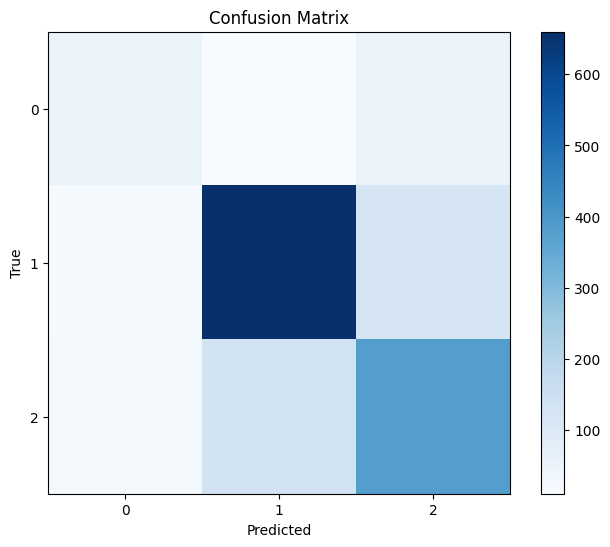

In [90]:
# Fazer previsões
y_pred = clf.predict(X_test)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [str(i) for i in range(len(conf_matrix))]
tick_marks = [i for i in range(len(conf_matrix))]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

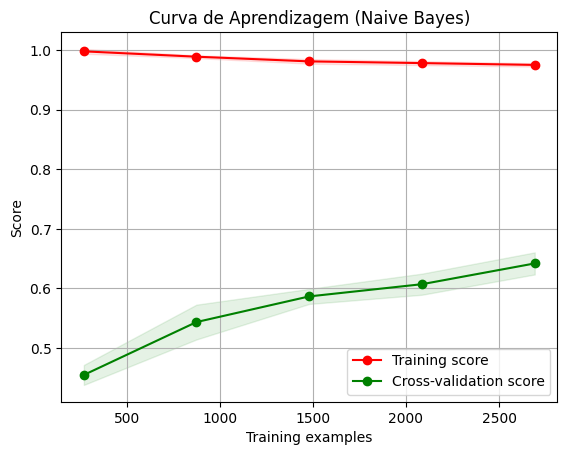

In [91]:
# Plote a curva de aprendizagem
title = "Curva de Aprendizagem (Naive Bayes)"
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


               0          1         2
short  -5.577045  -9.501786 -7.166187
tsla   -5.614710  -9.937229 -7.147552
price  -5.813467  -6.484654 -6.614098
aapl   -6.012842  -9.484808 -6.330620
recall -6.075835  -9.813038 -9.679943
spy    -6.134022 -11.141618 -7.590302
share  -6.168658  -5.389748 -5.984329
fall   -6.285752  -8.760168 -9.135150
model  -6.325089  -7.937803 -8.847137
sbux   -6.363209 -11.141618 -8.354483


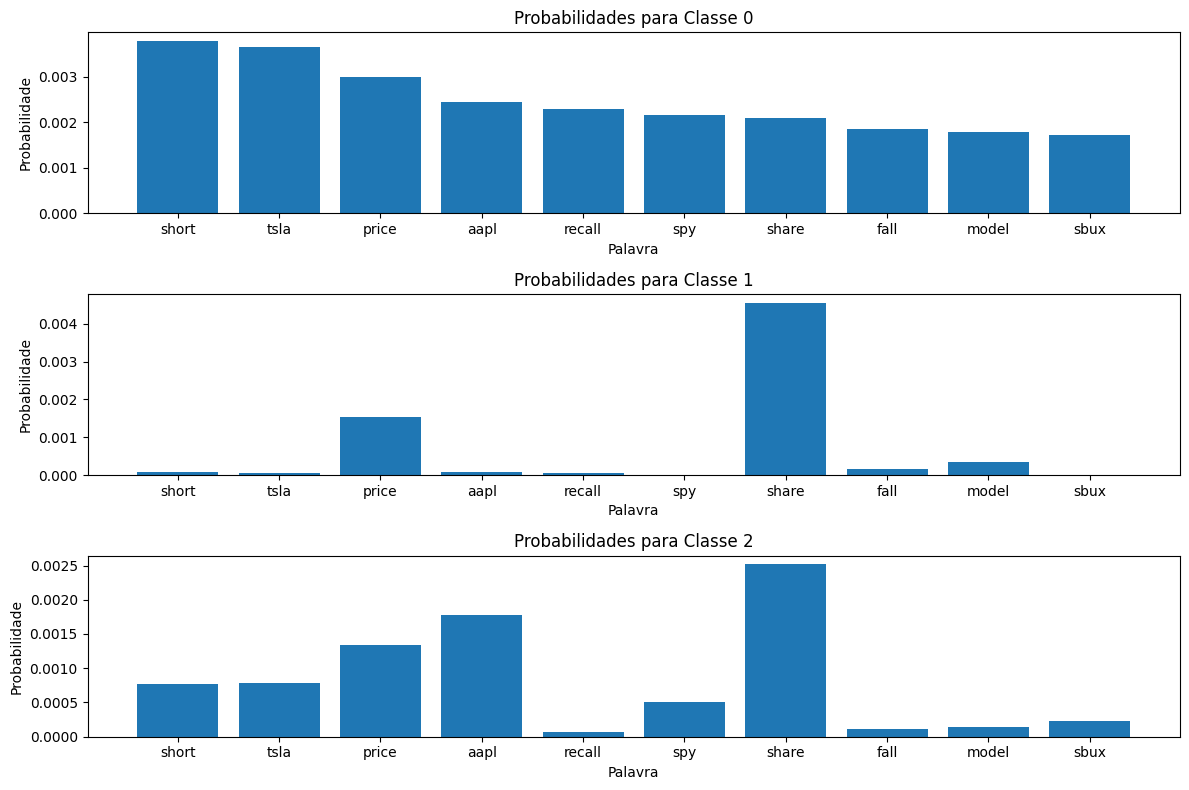

In [92]:
# Treine o modelo Naive Bayes Multinomial
clf = MultinomialNB(alpha=best_params['alpha'])
clf.fit(X_train, y_train)

# Obtenha os log probabilities das características para cada classe
log_probs = clf.feature_log_prob_

# Associe os log probabilities às palavras no vetorizador
feature_names = np.array(vectorizer.get_feature_names_out())

# Crie um DataFrame para visualizar as probabilidades
import pandas as pd
prob_df = pd.DataFrame(log_probs, columns=feature_names)

# Ordene o DataFrame pelas probabilidades em ordem decrescente
prob_df = prob_df.T.sort_values(by=[0, 1, 2], ascending=False)

# Visualize as 10 principais palavras e suas probabilidades para cada classe
print(prob_df.head(10))

# Plote as probabilidades das palavras mais importantes
plt.figure(figsize=(12, 8))
for i in range(3):  # assume 3 classes
    plt.subplot(3, 1, i + 1)
    plt.bar(prob_df.index[:10], np.exp(prob_df[i][:10])) 
    plt.title(f'Probabilidades para Classe {i}')
    plt.ylabel('Probabilidade')
    plt.xlabel('Palavra')

plt.tight_layout()
plt.show()


#### Rede Neural